## Task-3 Fraud Transaction Detection

The data set is downloaded from kaggle : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score  

In [32]:
df=pd.read_csv("creditcard.csv")

In [33]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [34]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [36]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [37]:
df['Time'].unique()

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.72787e+05,
       1.72788e+05, 1.72792e+05])

In [38]:
df['Amount'].unique()

array([149.62,   2.69, 378.66, ..., 381.05, 337.54,  95.63])

In [39]:
df['V1'].unique

<bound method Series.unique of 0         -1.359807
1          1.191857
2         -1.358354
3         -0.966272
4         -1.158233
            ...    
284802   -11.881118
284803    -0.732789
284804     1.919565
284805    -0.240440
284806    -0.533413
Name: V1, Length: 284807, dtype: float64>

In [40]:
missing_values = df.isnull().sum()

# Print the missing values count
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [41]:
import pandas as pd

def count_fraud_cases(df):
    fraud_count = 0
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check if the class label represents fraud (1)
        if row['Class'] == 1:
            fraud_count += 1
    
    return fraud_count

# Example usage
df = pd.DataFrame(df)  # Your DataFrame goes here

num_fraud_cases = count_fraud_cases(df)
print("Number of fraud cases:", num_fraud_cases)


Number of fraud cases: 492


In [42]:
import pandas as pd

def count_valid_cases(df):
    valid_count = 0
    
    # Iterate over each row in the DataFrame
    for index, row in df.iterrows():
        # Check if the class label represents fraud (1)
        if row['Class'] == 0:
            valid_count += 1
    
    return valid_count

# Example usage
df = pd.DataFrame(df)  # Your DataFrame goes here

num_valid_cases = count_valid_cases(df)
print("Number of valid cases:", num_valid_cases)


Number of valid cases: 284315


Ratio of fraud cases to valid cases:

Fraud cases: 492
Valid cases: 284,315
Ratio = Fraud cases / Valid cases

Ratio = 492 / 284,315

The ratio of fraud cases to valid cases is approximately 0.0017.

In [46]:
fraud_amount = df[df['Class'] == 1]['Amount'].sum()

valid_amount = df[df['Class'] == 0]['Amount'].sum()

print("Amount spent in fraud cases:", fraud_amount)
print("Amount spent in valid cases:", valid_amount)


Amount spent in fraud cases: 60127.97
Amount spent in valid cases: 25102462.04


In [47]:
fraud_transactions = df[df['Class'] == 1]['Amount']

valid_transactions = df[df['Class'] == 0]['Amount']

print("Fraud Transactions:")
print(fraud_transactions)

print("\nValid Transactions:")
print(valid_transactions)


Fraud Transactions:
541         0.00
623       529.00
4920      239.93
6108       59.00
6329        1.00
           ...  
279863    390.00
280143      0.76
280149     77.89
281144    245.00
281674     42.53
Name: Amount, Length: 492, dtype: float64

Valid Transactions:
0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284315, dtype: float64


In [48]:
print("Fraud Transactions Summary:")
print(fraud_transactions.describe())

print("\nValid Transactions Summary:")
print(valid_transactions.describe())

Fraud Transactions Summary:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Valid Transactions Summary:
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


The average amount for fraud transactions is higher than that for valid transactions ($122.21 vs. $88.29). This suggests that fraudulent activities tend to involve larger amounts.

In [49]:
# Calculate the correlation coefficients
correlation_matrix = df.corr()
fraud_correlation = correlation_matrix['Class'].drop('Class')  # Remove the class label itself

# Sort the variables based on their correlation with fraud
fraud_correlation = fraud_correlation.abs().sort_values(ascending=False)

print("Variables affecting fraud transactions (correlation coefficient):")
print(fraud_correlation)

Variables affecting fraud transactions (correlation coefficient):
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
Name: Class, dtype: float64


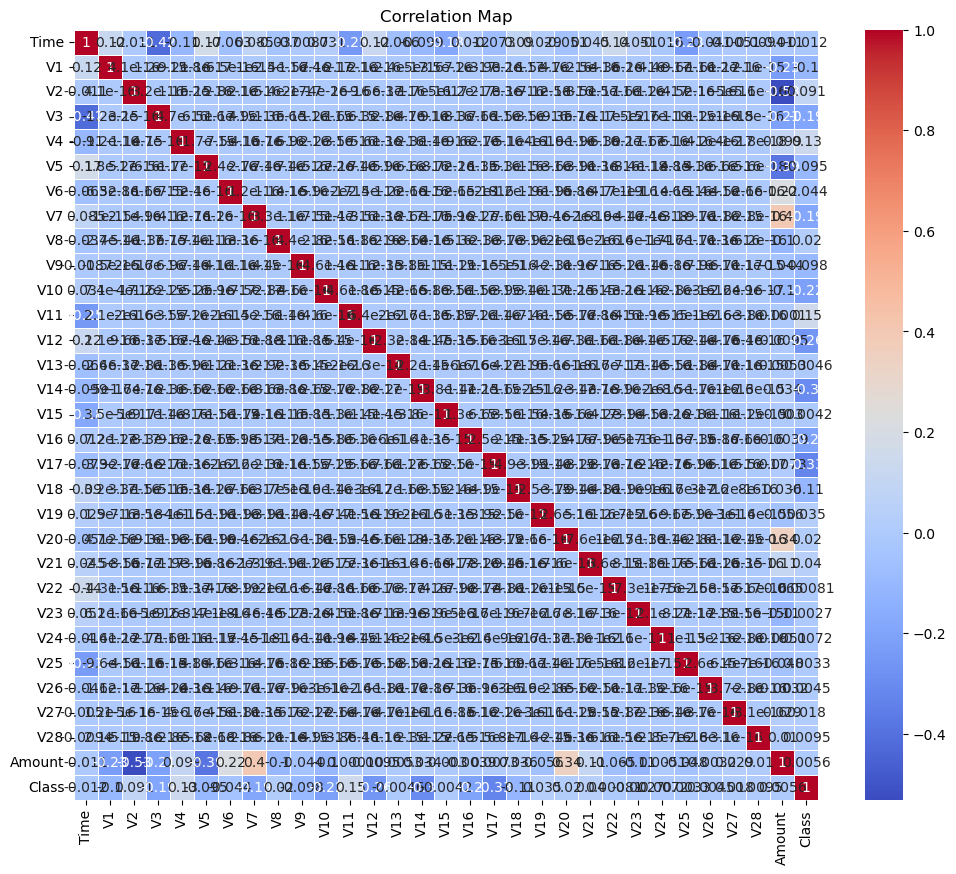

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Map')
plt.show()


In [51]:
# Select the features and target variable
features = df[['Time', 'Amount', 'V17', 'V14', 'V2', 'V10']]
target = df['Class']

In [52]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [53]:
# Create a linear regression model
model = LinearRegression()

In [54]:
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [56]:
# Convert predictions to binary values (0 or 1)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9985077771145676


In [58]:
# Define the new data
new_data = pd.DataFrame({
    'Time': [0.8, 1.0, 2.0],
    'Amount': [190.0, 200.0, 300.0],
    'V17': [0.550, -0.3, 0.7],
    'V14': [1.2, 0.8, -0.5],
    'V2': [0.92, 0.6, 0.9],
    'V10': [0.1, -0.4, 0.2]
})

In [63]:
features = new_data[['Time', 'Amount', 'V17', 'V14', 'V2', 'V10']]

In [64]:
# Make predictions on the new data
predictions = model.predict(features)

In [65]:

predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]


In [66]:
print('Predicted Labels:', predicted_labels)

Predicted Labels: [0, 0, 0]
